# Logistic Regression Classifier - ML project
Author: Andrii Zapukhlyi

## <span style="color:#8D35FF; text-decoration:underline">Data description</span>

### We have data on airline passenger satisfaction. Below is a description of the variables:
`Gender`: Gender of the passengers (Female, Male)

`Customer Type`: The customer type (Loyal customer, disloyal customer)

`Age`: The actual age of the passengers

`Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)

`Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

`Flight distance`: The flight distance of this journey

`Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

`Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient

`Ease of Online booking`: Satisfaction level of online booking

`Gate location`: Satisfaction level of Gate location

`Food and drink`: Satisfaction level of Food and drink

`Online boarding`: Satisfaction level of online boarding

`Seat comfort`: Satisfaction level of Seat comfort

`Inflight entertainment`: Satisfaction level of inflight entertainment

`On-board service`: Satisfaction level of On-board service

`Leg room service`: Satisfaction level of Leg room service

`Baggage handling`: Satisfaction level of baggage handling

`Check-in service`: Satisfaction level of Check-in service

`Inflight service`: Satisfaction level of inflight service

`Cleanliness`: Satisfaction level of Cleanliness

`Departure Delay in Minutes`: Minutes delayed when departure

`Arrival Delay in Minutes`: Minutes delayed when Arrival

`Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


### Our task will be to create a model using logistic regression for the prediction of the variable <span style="color:#8D35FF;">Satisfaction</span>

## <span style="color:#8D35FF; text-decoration:underline">Import librires and dataset</span>

In [1126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, auc

In [1127]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data)

## <span style="color:#8D35FF; text-decoration:underline">Data exploration</span>

In [1128]:
df.head()

,Unnamed: 0,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,1,0.0,70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,2,1.0,5047.0,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,3,2.0,110028.0,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,4,3.0,24026.0,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,5,4.0,119299.0,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


I don't use any of the columns with identifiers, because each of them has missing values, so I will delete them later (they have no effect on the result) 

Let's change all column names to lowercase, delete unnecessary columns and replace the value of 0 with NA in the columns with estimates, as mentioned in the data description

In [1129]:
df.rename(columns = lambda x: x.lower(), inplace = True)
df.drop(df.columns[[0,1,2]], axis = 1, inplace = True)
df.iloc[:, 6:20] = df.iloc[:, 6:20].replace(0, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103478 non-null  object 
 1   customer.type                      103500 non-null  object 
 2   age                                103469 non-null  float64
 3   type.of.travel                     103475 non-null  object 
 4   class                              103450 non-null  object 
 5   flight.distance                    103505 non-null  float64
 6   inflight.wifi.service              100386 non-null  float64
 7   departure.arrival.time.convenient  98188 non-null   float64
 8   ease.of.online.booking             99014 non-null   float64
 9   gate.location                      103505 non-null  float64
 10  food.and.drink                     103355 non-null  float64
 11  online.boarding                    1010

After that, we have 5 columns with variables of type categorical and 18 with numerical

In [1130]:
len(df[df.duplicated()])

0

There are no duplicate rows in our data frame

In [1131]:
df.isna().sum()

gender                                426
customer.type                         404
age                                   435
type.of.travel                        429
class                                 454
flight.distance                       399
inflight.wifi.service                3518
departure.arrival.time.convenient    5716
ease.of.online.booking               4890
gate.location                         399
food.and.drink                        549
online.boarding                      2861
seat.comfort                          421
inflight.entertainment                458
on.board.service                      416
leg.room.service                      912
baggage.handling                      450
checkin.service                       441
inflight.service                      450
cleanliness                           494
departure.delay.in.minutes            439
arrival.delay.in.minutes              722
satisfaction                            0
dtype: int64

There are missing values in every column of our dataset, except for the target column. Let's see how dependent the numerical columns are on each other

At first, replace satisfaction column with a binary, where 1 equals 'satisfied'.

In [1132]:
df.satisfaction = df.satisfaction.eq('satisfied').mul(1)
num = [col for col in df.columns if df[col].dtypes != 'O']

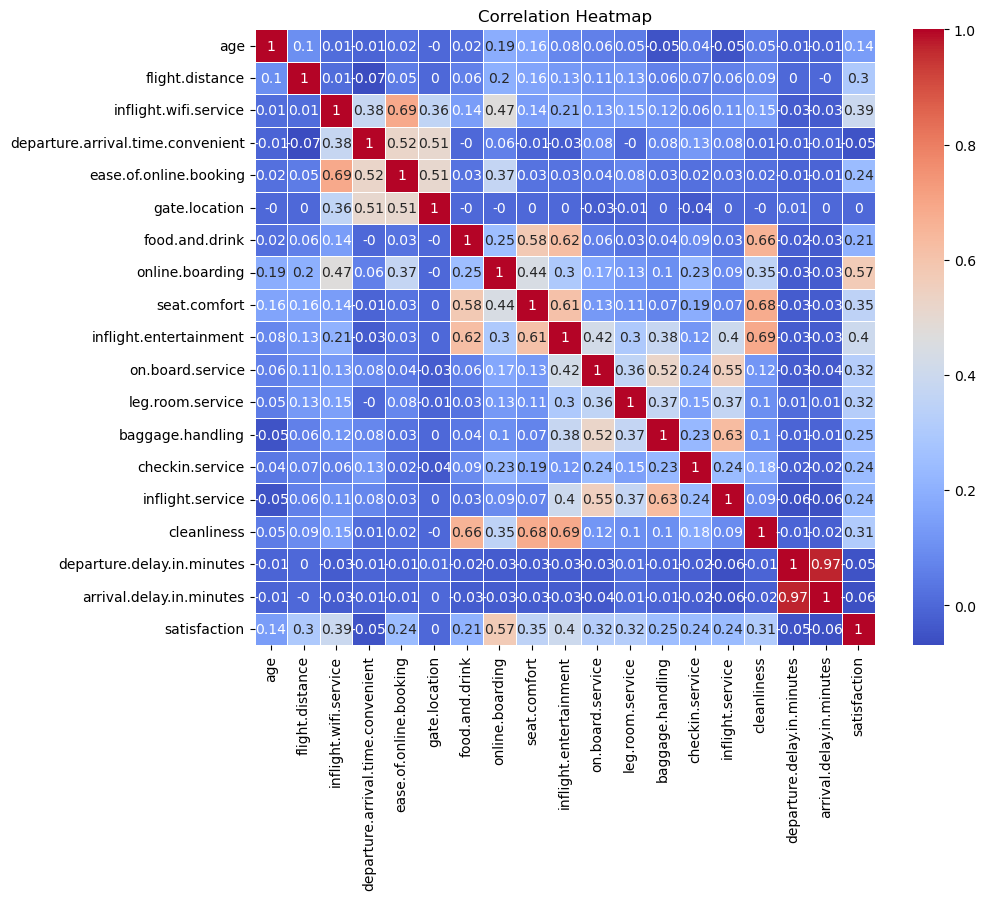

In [1133]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

We can see that there are columns on which the 'satisfaction' has little dependence.
However, I will not remove them because some of them are highly dependent on others, and also to build a better model.

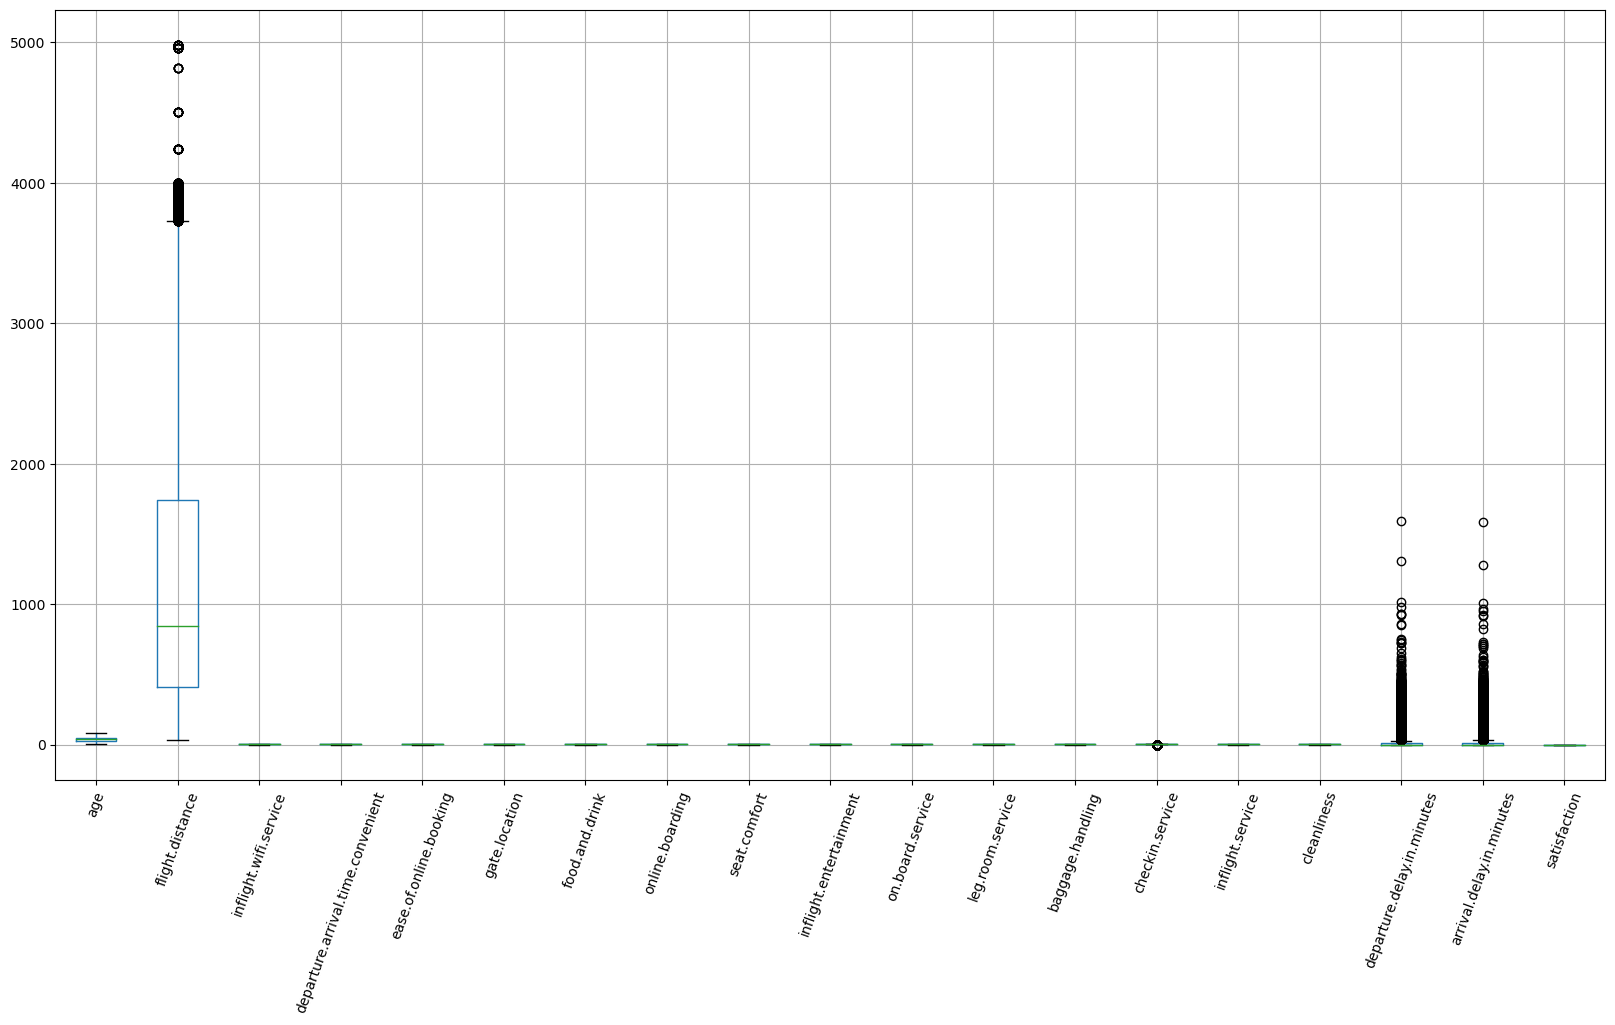

In [1134]:
plt.figure(figsize=(20, 10))  
df[num].boxplot()
plt.xticks(rotation=70) 
plt.show()

In the plot above, we can see that some columns have a lot of outliers. This will affect the choice of the method for processing missing values

We will also see if our class is balanced

<Axes: >

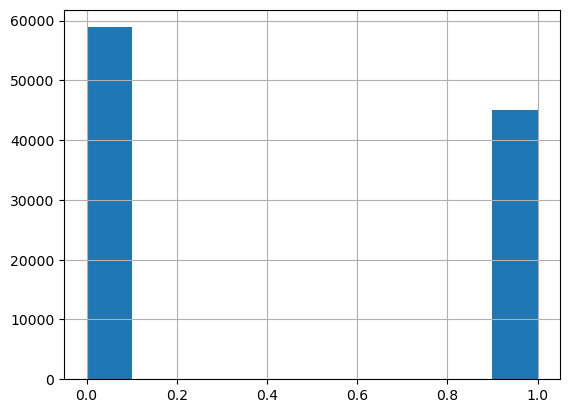

In [1135]:
df.satisfaction.hist()

In [1136]:
round(df.satisfaction.value_counts(normalize=True)*100)

satisfaction
0    57.0
1    43.0
Name: proportion, dtype: float64

The plot and proportions show that our class is balanced, so we can move on to the next step

## <span style="color:#8D35FF; text-decoration:underline">Data engineering</span>

Before working with missing values, I'll split our data set on training and test sets.

At first, let's define our target

In [1137]:
predictors = df.drop('satisfaction', axis = 1)
target = df['satisfaction']

Now, we can get training and test sets

In [1138]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=7)

X_train.shape, X_test.shape

((72732, 22), (31172, 22))

### Cleaning missing values in numerical variables

According to our data exploration, some columns have outliers. So, I will use median imputation to fill in the missing values, because it's robust to outliers.

Imputation should be performed on the training set and then extended to the test set. This means that the statistics that will be used to fill in the missing values in the training and test samples should be derived from the training sample only. This is to avoid overfitting.

In [1139]:
num.remove('satisfaction')
for df1 in [X_train, X_test]:
    for col in num:
        median = X_train[col].median()
        df1[col].fillna(median, inplace=True)

### Cleaning missing values in categorical variables

To get rid of the missing categorical values, I will fill them in with most frequent value

In [1140]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

In [1141]:
for df2 in [X_train, X_test]:
    for col in categorical:
        df2[col].fillna(X_train[col].mode()[0], inplace = True)
        
X_train.isna().sum()

gender                               0
customer.type                        0
age                                  0
type.of.travel                       0
class                                0
flight.distance                      0
inflight.wifi.service                0
departure.arrival.time.convenient    0
ease.of.online.booking               0
gate.location                        0
food.and.drink                       0
online.boarding                      0
seat.comfort                         0
inflight.entertainment               0
on.board.service                     0
leg.room.service                     0
baggage.handling                     0
checkin.service                      0
inflight.service                     0
cleanliness                          0
departure.delay.in.minutes           0
arrival.delay.in.minutes             0
dtype: int64

In [1142]:
X_test.isna().sum()

gender                               0
customer.type                        0
age                                  0
type.of.travel                       0
class                                0
flight.distance                      0
inflight.wifi.service                0
departure.arrival.time.convenient    0
ease.of.online.booking               0
gate.location                        0
food.and.drink                       0
online.boarding                      0
seat.comfort                         0
inflight.entertainment               0
on.board.service                     0
leg.room.service                     0
baggage.handling                     0
checkin.service                      0
inflight.service                     0
cleanliness                          0
departure.delay.in.minutes           0
arrival.delay.in.minutes             0
dtype: int64

Now, we can notice, that there are no missing values in our X_train and X_test sets

### Cleaning outliers in flight.distance, departure.delay.in.minutes, arrival.delay.in.minutes columns. 

Our three columns have outliers, so i will clean it with IQR method 

In [1143]:
IQR = df['flight.distance'].quantile(0.75) - df['flight.distance'].quantile(0.25)
low_lim = df['flight.distance'].quantile(0.25) - (IQR * 1.5)
up_lim = df['flight.distance'].quantile(0.75) + (IQR * 1.5)
print("From:", low_lim, "to" ,up_lim)

From: -1576.5 to 3731.5


In [1144]:
IQR = df['departure.delay.in.minutes'].quantile(0.75) - df['departure.delay.in.minutes'].quantile(0.25)
low_lim = df['departure.delay.in.minutes'].quantile(0.25) - (IQR * 1.5)
up_lim = df['departure.delay.in.minutes'].quantile(0.75) + (IQR * 1.5)
print("From:", low_lim, "to" ,up_lim)

From: -18.0 to 30.0


In [1145]:
IQR = df['arrival.delay.in.minutes'].quantile(0.75) - df['arrival.delay.in.minutes'].quantile(0.25)
low_lim = df['arrival.delay.in.minutes'].quantile(0.25) - (IQR * 1.5)
up_lim = df['arrival.delay.in.minutes'].quantile(0.75) + (IQR * 1.5)
print("From:", low_lim, "to" ,up_lim)

From: -19.5 to 32.5


In [1146]:
def max_value(dataset, col, up):
    return np.where(dataset[col] > up, up, dataset[col])

for df3 in [X_train, X_test]:
    df3['flight.distance'] = max_value(df3, 'flight.distance', 3731.5)
    df3['departure.delay.in.minutes'] = max_value(df3, 'departure.delay.in.minutes', 30)
    df3['arrival.delay.in.minutes'] = max_value(df3, 'arrival.delay.in.minutes', 32.5)
    

X_train[num].describe()

,age,flight.distance,inflight.wifi.service,departure.arrival.time.convenient,ease.of.online.booking,gate.location,food.and.drink,online.boarding,seat.comfort,inflight.entertainment,on.board.service,leg.room.service,baggage.handling,checkin.service,inflight.service,cleanliness,departure.delay.in.minutes,arrival.delay.in.minutes
count,72732.000000,72732.000000,72732.000000,72732.000000,72732.00000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000
mean,39.330144,1188.132995,2.821069,3.214747,2.88789,2.979665,3.203927,3.347632,3.439573,3.359402,3.384246,3.371473,3.633476,3.299112,3.641891,3.283314,7.331422,7.856301
std,15.067657,988.033002,1.233943,1.348882,1.26896,1.274912,1.322991,1.253023,1.318087,1.329997,1.284739,1.292980,1.175860,1.263237,1.172472,1.309067,11.195305,11.957955
min,7.000000,31.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,416.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,3731.500000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.500000


Now our data is even better, our next step is to encode the categorical variables

### Encode categorical variables

I will use One-hot encoding to convert categorical variables into numerical

In [1147]:
X_train = pd.concat([X_train[num], pd.get_dummies(X_train["gender"]), 
                     pd.get_dummies(X_train["customer.type"]),
                     pd.get_dummies(X_train["type.of.travel"]),
                     pd.get_dummies(X_train["class"])], axis = 1)

In [1148]:
X_test = pd.concat([X_test[num], pd.get_dummies(X_test["gender"]),
                     pd.get_dummies(X_test["customer.type"]),
                     pd.get_dummies(X_test["type.of.travel"]),
                     pd.get_dummies(X_test["class"])], axis = 1)

## <span style="color:#8D35FF; text-decoration:underline">Data scaling</span>

For data scaling, I will use MinMaxScaler 

In [1149]:
columns = X_train.columns
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=[columns])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=[columns])
X_train.describe()

,age,flight.distance,inflight.wifi.service,departure.arrival.time.convenient,ease.of.online.booking,gate.location,food.and.drink,online.boarding,seat.comfort,inflight.entertainment,...,arrival.delay.in.minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
count,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,...,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000,72732.000000
mean,0.414489,0.312696,0.455267,0.553687,0.471972,0.494916,0.550982,0.586908,0.609893,0.589850,...,0.241732,0.509844,0.490156,0.817893,0.182107,0.690136,0.309864,0.480421,0.447836,0.071743
std,0.193175,0.267000,0.308486,0.337221,0.317240,0.318728,0.330748,0.313256,0.329522,0.332499,...,0.367937,0.499907,0.499907,0.385935,0.385935,0.462440,0.462440,0.499620,0.497275,0.258063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.104040,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.219700,0.500000,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,0.750000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564103,0.462910,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,1.000000,0.750000,...,0.400000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now our X_train dataset ready to be fed into the Logistic Regression classifier

## <span style="color:#8D35FF; text-decoration:underline">Model training</span>

In [1150]:
model = LogisticRegression(solver='liblinear', random_state=7)
model.fit(X_train, y_train)

LogisticRegression(random_state=7, solver='liblinear')

## <span style="color:#8D35FF; text-decoration:underline">Making prediction</span>

In [1151]:
prediction = model.predict(X_test)

### Check for overfitting and underfitting

In [1152]:
print("Training set:", round(model.score(X_train, y_train),4)) 
print("Test set:", round(model.score(X_test, y_test),4))

Training set: 0.8878
Test set: 0.8887


The values of the test and training sets are close to each other, so model is not overfitted

### Confusion matrix

<Axes: >

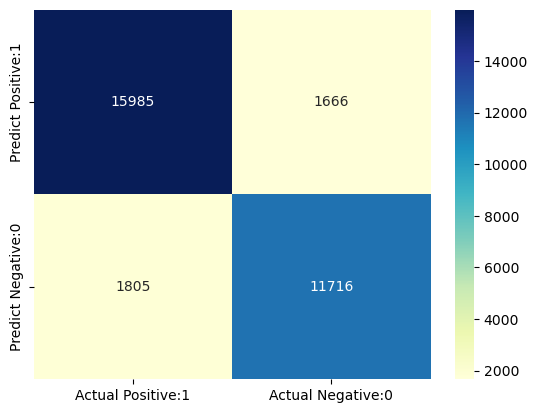

In [1153]:
cm = confusion_matrix(y_test, prediction)
cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Accuracy Score, Precision Score, Recall Score, F1 Score, ROC - AUC

Accuracy Score: 0.889
Precision Score: 0.876
Recall Score: 0.867
F1 Score: 0.871
ROC AUC Score: 0.886
AUC: 0.954


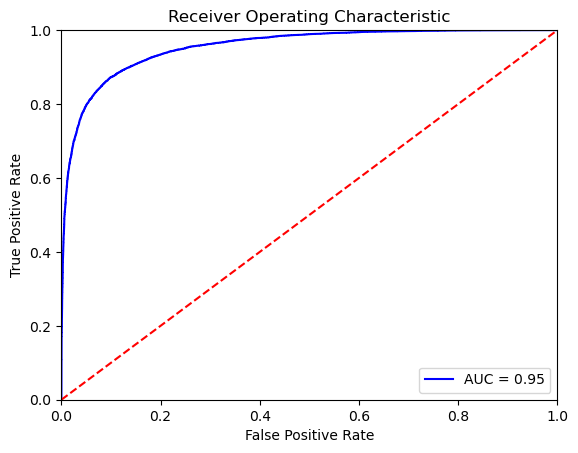

In [1154]:
def metrics(df_target,predict,class_probabilities):
    print(f"Accuracy Score: {accuracy_score(df_target, predict).round(3)}")
    print(f"Precision Score: {precision_score(df_target, predict).round(3)}")
    print(f"Recall Score: {recall_score(df_target, predict).round(3)}")
    print(f"F1 Score: {f1_score(df_target, predict).round(3)}")
    print(f"ROC AUC Score: {roc_auc_score(df_target, predict).round(3)}")

    preds = class_probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(df_target, preds)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc.round(3)}")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

probs = model.predict_proba(X_test)
metrics(y_test, prediction, probs)

## <span style="color:#8D35FF; text-decoration:underline">Conclusion</span>

#### All the model scores are high, especially the AUC, which is 0.954, which is an excellent score. The model doesn't show any signs of under- or overfitting.